In [1]:
import pandas as pd

df = pd.read_csv("FactorAnalysis.csv")

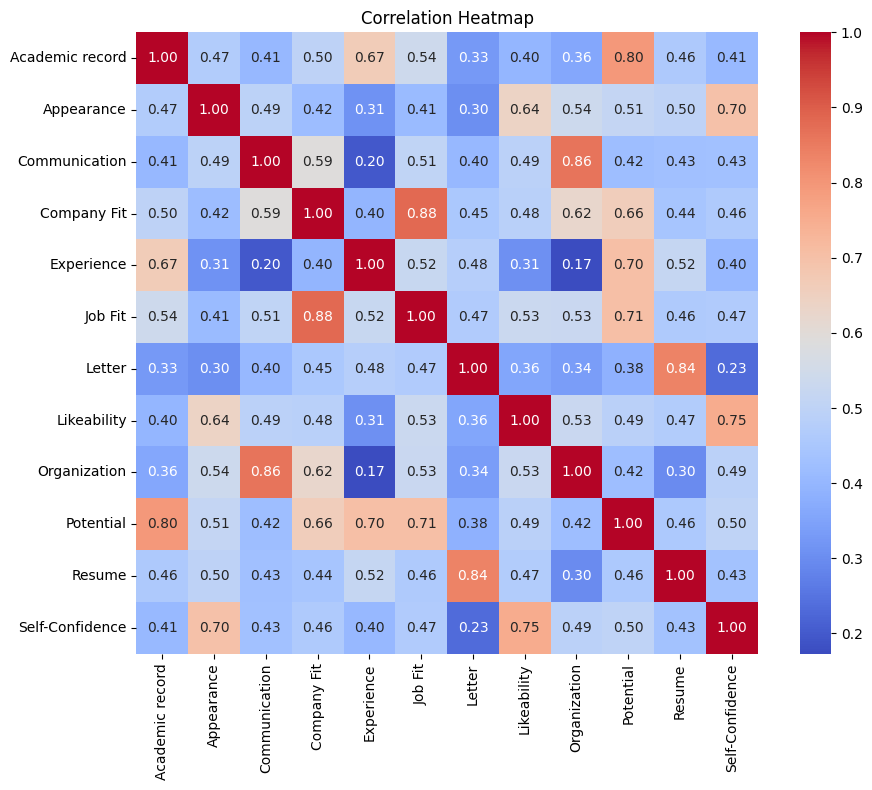

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 8))

# Customize the heatmap
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f", square=True)

# Set title and labels
plt.title("Correlation Heatmap")

# Show the plot
plt.tight_layout()
plt.show()

# Factor Analysis

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from factor_analyzer import FactorAnalyzer


def plot_cumulative_scree(df, variance_threshold=0.8):
    # Perform factor analysis
    fa = FactorAnalyzer()
    fa.fit(df)

    # Get eigenvalues and calculate the proportion of variance explained
    ev, v = fa.get_eigenvalues()
    variance_explained = ev / np.sum(ev)

    # Calculate cumulative variance explained
    cumulative_variance_explained = np.cumsum(variance_explained)

    # Find the index where the cumulative variance crosses the threshold
    threshold_index = np.argmax(cumulative_variance_explained >= variance_threshold) + 1

    # Plot cumulative variance explained
    fig, ax = plt.subplots()
    ax.plot(
        range(1, df.shape[1] + 1),
        cumulative_variance_explained,
        marker="o",
        linestyle="-",
    )
    ax.axvline(
        threshold_index, color="r", linestyle="--"
    )  # Add reference line at the threshold index
    ax.set_xlabel("Factor Number")
    ax.set_ylabel("Cumulative Variance Explained")
    ax.set_title("Cumulative Scree Plot")

    # Customize the plot
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.yaxis.grid(True, linestyle="--", alpha=0.7)
    ax.xaxis.set_tick_params(length=0)
    ax.yaxis.set_tick_params(length=0)
    ax.tick_params(axis="x", which="both", bottom=False)

    # Highlight the variance explained at the threshold index
    highlight_indices = np.arange(1, threshold_index + 1)
    highlight_values = cumulative_variance_explained[highlight_indices - 1]
    ax.scatter(highlight_indices, highlight_values, color="green", zorder=5)

    # Annotate the highlighted variance explained
    for i, txt in enumerate(highlight_values):
        ax.annotate(
            f"{txt:.2%}",
            (highlight_indices[i], txt),
            xytext=(5, -15),
            textcoords="offset points",
            ha="center",
            color="green",
        )

    # Show the plot
    plt.tight_layout()
    plt.show()


def analyze_factor_loadings(fa, df, correlation_threshold=0.4):
    # Identify strongly correlated variables for each factor
    positively_correlated_vars = [
        np.where(fa.loadings_[:, i] > correlation_threshold)[0]
        for i in range(fa.n_factors)
    ]

    negatively_correlated_vars = [
        np.where(fa.loadings_[:, i] < -correlation_threshold)[0]
        for i in range(fa.n_factors)
    ]

    # Print the strongly correlated variables for each factor
    for i, (positive_vars, negative_vars) in enumerate(
        zip(positively_correlated_vars, negatively_correlated_vars)
    ):
        positive_vars_str = ", ".join(df.columns[positive_vars])
        negative_vars_str = ", ".join(df.columns[negative_vars])
        print(
            "Factor {}: [{}] - [{}]".format(i + 1, positive_vars_str, negative_vars_str)
        )
    print()

    # Determine the factors associated with each variable
    variable_factors = [[] for _ in range(df.shape[1])]
    for i, (positive_vars, negative_vars) in enumerate(
        zip(positively_correlated_vars, negatively_correlated_vars)
    ):
        for j in positive_vars:
            variable_factors[j].append(i + 1)

        for j in negative_vars:
            variable_factors[j].append(-(i + 1))

    # Print the communalities, factors, and variables
    communalities = fa.get_communalities()
    max_var_length = max(map(len, df.columns))
    for factors, variable, communality in sorted(
        zip(variable_factors, df.columns, communalities)
    ):
        factor_str = ", ".join(map(str, factors))
        variable_padded = variable.ljust(max_var_length)
        print(
            "Variable: {}  Communality: {:.5f}  Factors: {}".format(
                variable_padded, communality, factor_str
            )
        )

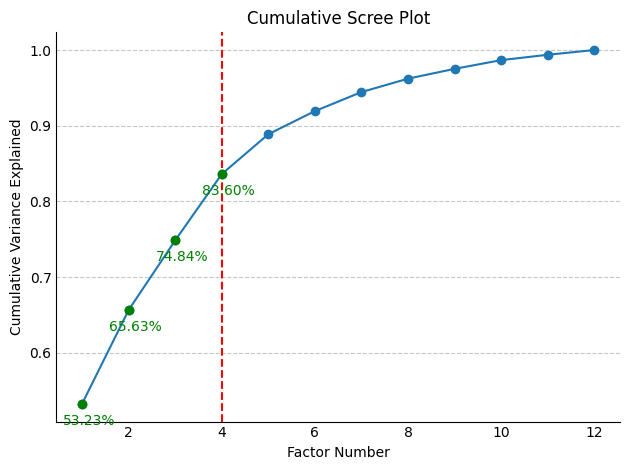

In [4]:
plot_cumulative_scree(df, 0.8)

In [5]:
#  (a) varimax (orthogonal rotation)
#  (b) promax (oblique rotation)
#  (c) oblimin (oblique rotation)
#  (d) oblimax (orthogonal rotation)
#  (e) quartimin (oblique rotation)
#  (f) quartimax (orthogonal rotation)
#  (g) equamax (orthogonal rotation)

In [6]:
fa = FactorAnalyzer(4, rotation="promax")
fa.fit(df)

analyze_factor_loadings(fa, df, 0.5)

Factor 1: [Academic record, Experience, Job Fit, Potential] - []
Factor 2: [Communication, Company Fit, Organization] - []
Factor 3: [Appearance, Likeability, Self-Confidence] - []
Factor 4: [Letter, Resume] - []

Variable: Academic record  Communality: 0.60815  Factors: 1
Variable: Experience       Communality: 0.77876  Factors: 1
Variable: Job Fit          Communality: 0.54983  Factors: 1
Variable: Potential        Communality: 0.90903  Factors: 1
Variable: Communication    Communality: 0.70886  Factors: 2
Variable: Company Fit      Communality: 0.61336  Factors: 2
Variable: Organization     Communality: 0.91520  Factors: 2
Variable: Appearance       Communality: 0.52465  Factors: 3
Variable: Likeability      Communality: 0.49169  Factors: 3
Variable: Self-Confidence  Communality: 0.78408  Factors: 3
Variable: Letter           Communality: 1.01123  Factors: 4
Variable: Resume           Communality: 0.72530  Factors: 4


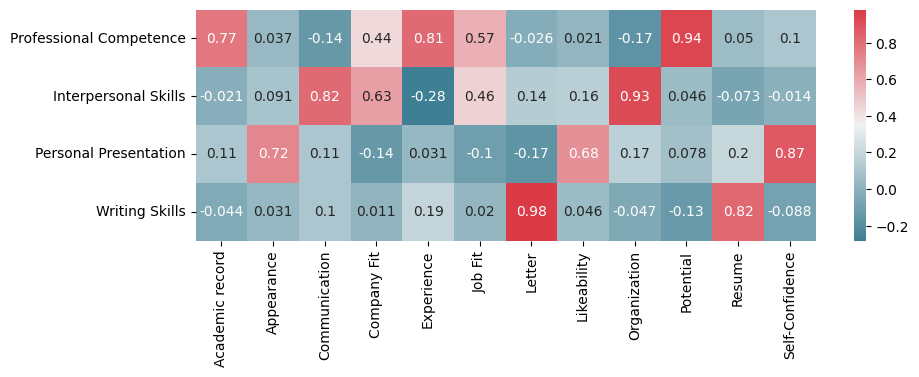

In [7]:
labels = [
    "Professional Competence",
    "Interpersonal Skills",
    "Personal Presentation",
    "Writing Skills",
]  # 4-factor promax

# labels = [
#     "Personal Presentation",
#     "Professional Competence",
#     "Writing Skills",
#     "Interpersonal Skills",
#     "Overall Fit",
# ] # 5-factor promax

# labels = [
#     "Professional Competence",
#     "Personal Presentation",
#     "Writing Skills",
#     "Interpersonal Skills",
#     "Overall Fit",
# ] # 5-factor

# labels = [
#     "Professional Competence",
#     "Personal Presentation",
#     "Interpersonal Skills",
#     "Writing Skills",
#     "Overall Fit",
# ] # 5-factor varimax

plt.figure(figsize=(10, 3))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    fa.loadings_.T,
    annot=True,
    xticklabels=df.columns,
    yticklabels=labels,
    cmap=cmap,
)
plt.show()

# Second Order Factor Analysis

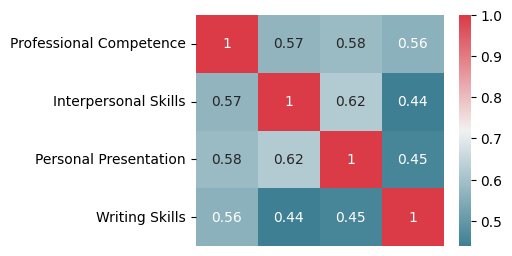

In [8]:
# Transform variables into factors
factor_scores = fa.transform(df)

# Create a new data frame with factor scores and factor names as column labels
factor_df = pd.DataFrame(factor_scores, columns=labels)

plt.figure(figsize=(4, 3))
sns.heatmap(factor_df.corr(), annot=True, cmap=cmap, xticklabels=False)
plt.show()

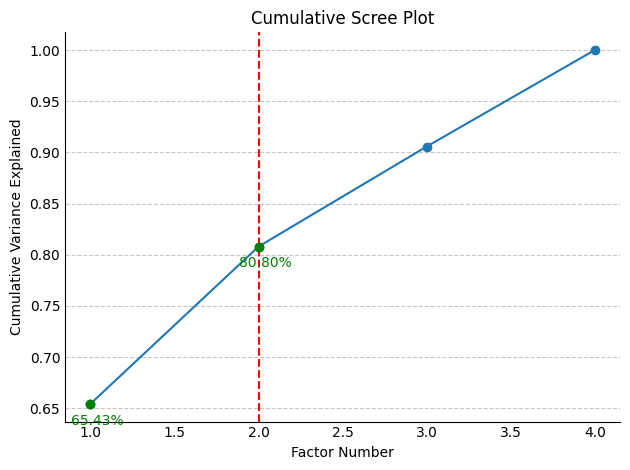

In [9]:
plot_cumulative_scree(factor_df)

In [10]:
fa2 = FactorAnalyzer(2, rotation="varimax")
fa2.fit(factor_df)

analyze_factor_loadings(fa2, factor_df, 0.5)

Factor 1: [Interpersonal Skills, Personal Presentation] - []
Factor 2: [Professional Competence, Writing Skills] - []

Variable: Interpersonal Skills     Communality: 0.62719  Factors: 1
Variable: Personal Presentation    Communality: 0.61773  Factors: 1
Variable: Professional Competence  Communality: 0.67736  Factors: 2
Variable: Writing Skills           Communality: 0.47084  Factors: 2


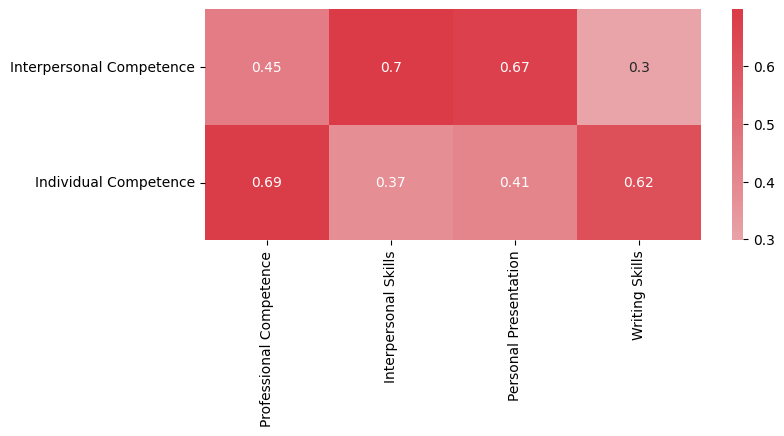

In [11]:
labels2 = ["Interpersonal Competence", "Individual Competence"]

plt.figure(figsize=(8, 3))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    fa2.loadings_.T,
    annot=True,
    xticklabels=factor_df.columns,
    yticklabels=labels2,
    cmap=cmap,
    center=0,
)
plt.show()

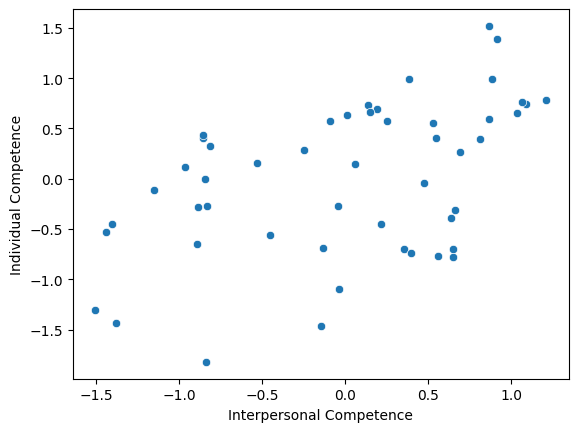

In [26]:
factor2_df = pd.DataFrame(fa2.transform(factor_df), columns=labels2)
sns.scatterplot(data=factor2_df, x=labels2[0], y=labels2[1])
plt.show()

In [13]:
pd.concat([df, factor_df, factor2_df], axis=1)

,Academic record,Appearance,Communication,Company Fit,Experience,Job Fit,Letter,Likeability,Organization,Potential,Resume,Self-Confidence,Professional Competence,Interpersonal Skills,Personal Presentation,Writing Skills,Interpersonal Competence,Individual Competence
0,6,8,7,5,6,5,7,7,7,6,7,7,-1.148358,-0.349693,-0.007047,-0.162109,-0.131626,-0.684117
1,9,8,8,8,10,9,8,9,8,9,9,9,1.454991,0.761897,1.351227,0.719691,0.882907,0.996132
2,6,7,7,6,6,7,7,8,8,6,6,8,-0.947534,0.348369,0.252470,-0.335859,0.353176,-0.699805
3,7,8,6,5,8,5,9,8,7,8,7,7,0.011949,-0.447952,0.102588,0.656686,-0.247082,0.282607
4,4,7,8,6,6,6,6,7,8,5,4,6,-1.749764,0.302842,-1.061924,-1.276142,-0.144794,-1.467100
5,7,7,7,5,5,6,5,7,8,7,4,6,-0.899806,0.164790,-0.676758,-1.612821,-0.036532,-1.099622
6,6,8,6,7,7,7,8,7,5,7,8,7,-0.146283,-0.700355,-0.295217,0.465213,-0.531665,0.153632
7,7,6,6,5,8,6,7,6,5,7,6,6,-0.238628,-1.167337,-1.312706,-0.304910,-1.150645,-0.115285
8,9,8,8,9,9,8,10,7,8,8,9,8,0.887579,0.841543,0.292178,1.556090,0.385752,0.991321
9,6,8,7,8,6,7,8,7,8,6,7,7,-0.812683,0.630257,-0.250667,0.191967,0.217157,-0.445176


# Some Experiments

In [14]:
def flip_negative_loadings(loadings):
    positive_loadings = loadings > 0
    count_positive_loadings = np.sum(positive_loadings, axis=0)
    centered_count = count_positive_loadings - loadings.shape[0] / 2
    factors_to_flip = centered_count < 0
    flipped_loadings = loadings * (-1) ** factors_to_flip

    return flipped_loadings


def make_highest_magnitude_positive(loadings):
    max_magnitude_indices = np.argmax(np.abs(loadings), axis=0)
    max_magnitude_values = loadings[max_magnitude_indices, np.arange(loadings.shape[1])]
    factors_to_flip = max_magnitude_values < 0
    flipped_loadings = loadings * (-1) ** factors_to_flip

    return flipped_loadings

In [15]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.rotator import Rotator

num_factors = 5

auto_rotated_fa = FactorAnalyzer(num_factors, rotation="varimax", method="minres")
auto_rotated_fa.fit(df)

rotator = Rotator(method="varimax")
mnal_rotated_fa = FactorAnalyzer(num_factors, rotation=None)
mnal_rotated_fa.fit(df)
varimax_rotated_loadings = rotator.fit_transform(mnal_rotated_fa.loadings_[:])
mnal_rotated_fa.loadings_ = make_highest_magnitude_positive(varimax_rotated_loadings)

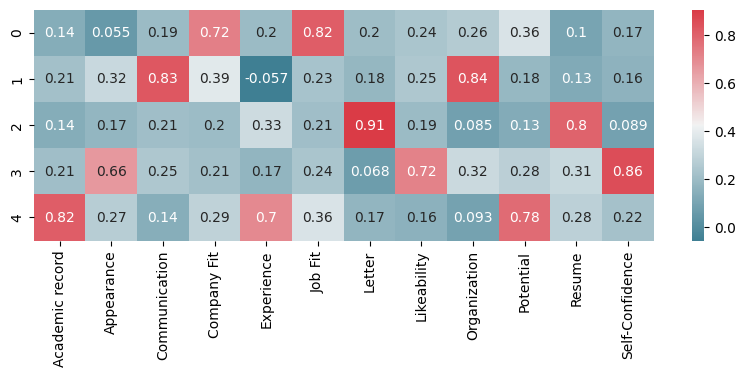

In [25]:
plt.figure(figsize=(10, 3))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    flip_negative_loadings(mnal_rotated_fa.loadings_).T,
    annot=True,
    xticklabels=df.columns,
    # yticklabels=labels,
    cmap=cmap,
)
plt.show()

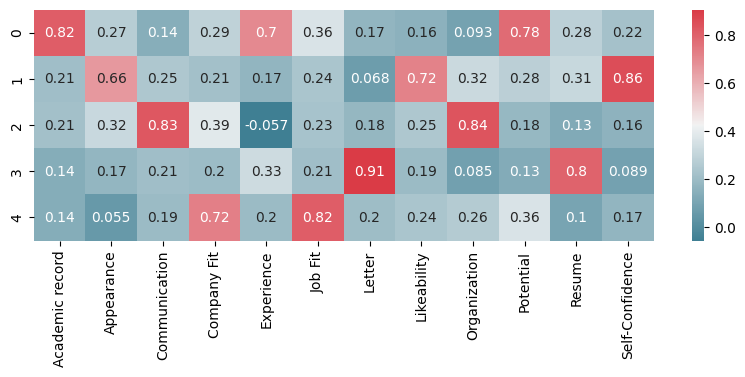

In [17]:
plt.figure(figsize=(10, 3))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    flip_negative_loadings(auto_rotated_fa.loadings_).T,
    annot=True,
    xticklabels=df.columns,
    # yticklabels=labels,
    cmap=cmap,
)
plt.show()

In [18]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.rotator import Rotator

rotation = "varimax"

num_factors = 4
fa = FactorAnalyzer(num_factors, rotation=rotation)
fa.fit(df)

# Create a new FactorAnalyzer object
fa_x = FactorAnalyzer(num_factors, rotation=None)
fa_x.fit(df)

first_factor_loadings = fa_x.loadings_[:, :0]
remaining_loadings = fa_x.loadings_[:, 0:]

rotator = Rotator(method=rotation)
varimax_rotated_loadings = rotator.fit_transform(remaining_loadings)

final_loadings = np.column_stack((first_factor_loadings, varimax_rotated_loadings))
final_loadings = make_highest_magnitude_positive(final_loadings)

# Assign the final_loadings to the loadings_ attribute
fa_x.loadings_ = final_loadings

# analyze_factor_loadings(fa_final, df, 0.4)

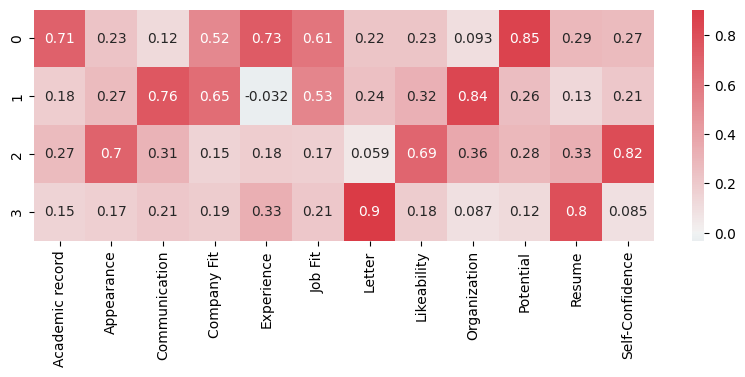

In [19]:
plt.figure(figsize=(10, 3))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    fa.loadings_.T,
    annot=True,
    xticklabels=df.columns,
    # yticklabels=labels,
    center=0,
    cmap=cmap,
)
plt.show()

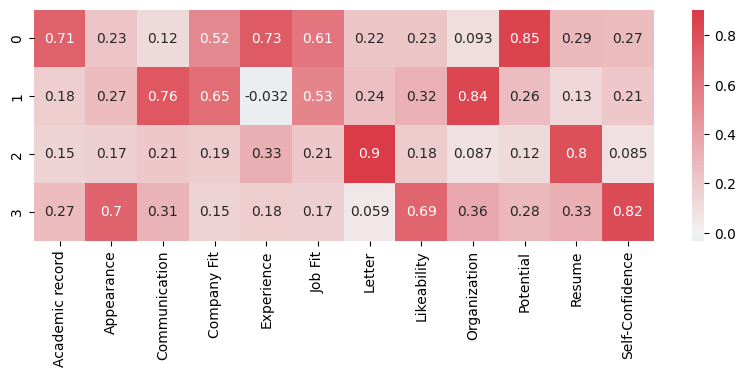

In [20]:
plt.figure(figsize=(10, 3))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    fa_x.loadings_.T,
    annot=True,
    xticklabels=df.columns,
    # yticklabels=labels,
    center=0,
    cmap=cmap,
)
plt.show()

In [21]:
fa_x.transform(df)[:5]

array([[-1.34604417, -0.15981689,  0.15652306,  0.3435224 ],
       [ 1.22246579,  0.15669277,  0.19317359,  1.07573811],
       [-1.25635047,  0.60215673, -0.21295668,  0.46708673],
       [-0.06917649, -0.65183324,  0.80619321,  0.15470013],
       [-1.75784951,  1.19886578, -0.92447662, -0.85452791]])

In [22]:
fa.transform(df)[:5]

array([[-1.34604417, -0.15981689,  0.3435224 ,  0.15652306],
       [ 1.22246579,  0.15669277,  1.07573811,  0.19317359],
       [-1.25635047,  0.60215673,  0.46708673, -0.21295668],
       [-0.06917649, -0.65183324,  0.15470013,  0.80619321],
       [-1.75784951,  1.19886578, -0.85452791, -0.92447662]])